In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/uci-ml-repo/ucimlrepo.git
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic')
df

In [ ]:
df.shape

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

In [ ]:
#Removing Duplicates
df=df.drop_duplicates()

In [ ]:
#Checking for null values
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['radius1']=le.fit_transform(df['radius1'])
df['texture1']=le.fit_transform(df['texture1'])
df['perimeter1']=le.fit_transform(df['perimeter1'])
df['area1']=le.fit_transform(df['area1'])
df['smoothness1']=le.fit_transform(df['smoothness1'])
df['compactness1']=le.fit_transform(df['compactness1'])
df['concavity1']=le.fit_transform(df['concavity1'])
df['concave_points1']=le.fit_transform(df['concave_points1'])
df['symmetry1']=le.fit_transform(df['symmetry1'])
df['fractal_dimension1']=le.fit_transform(df['fractal_dimension1'])

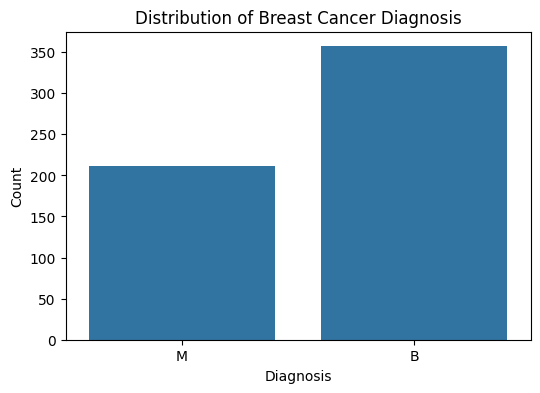

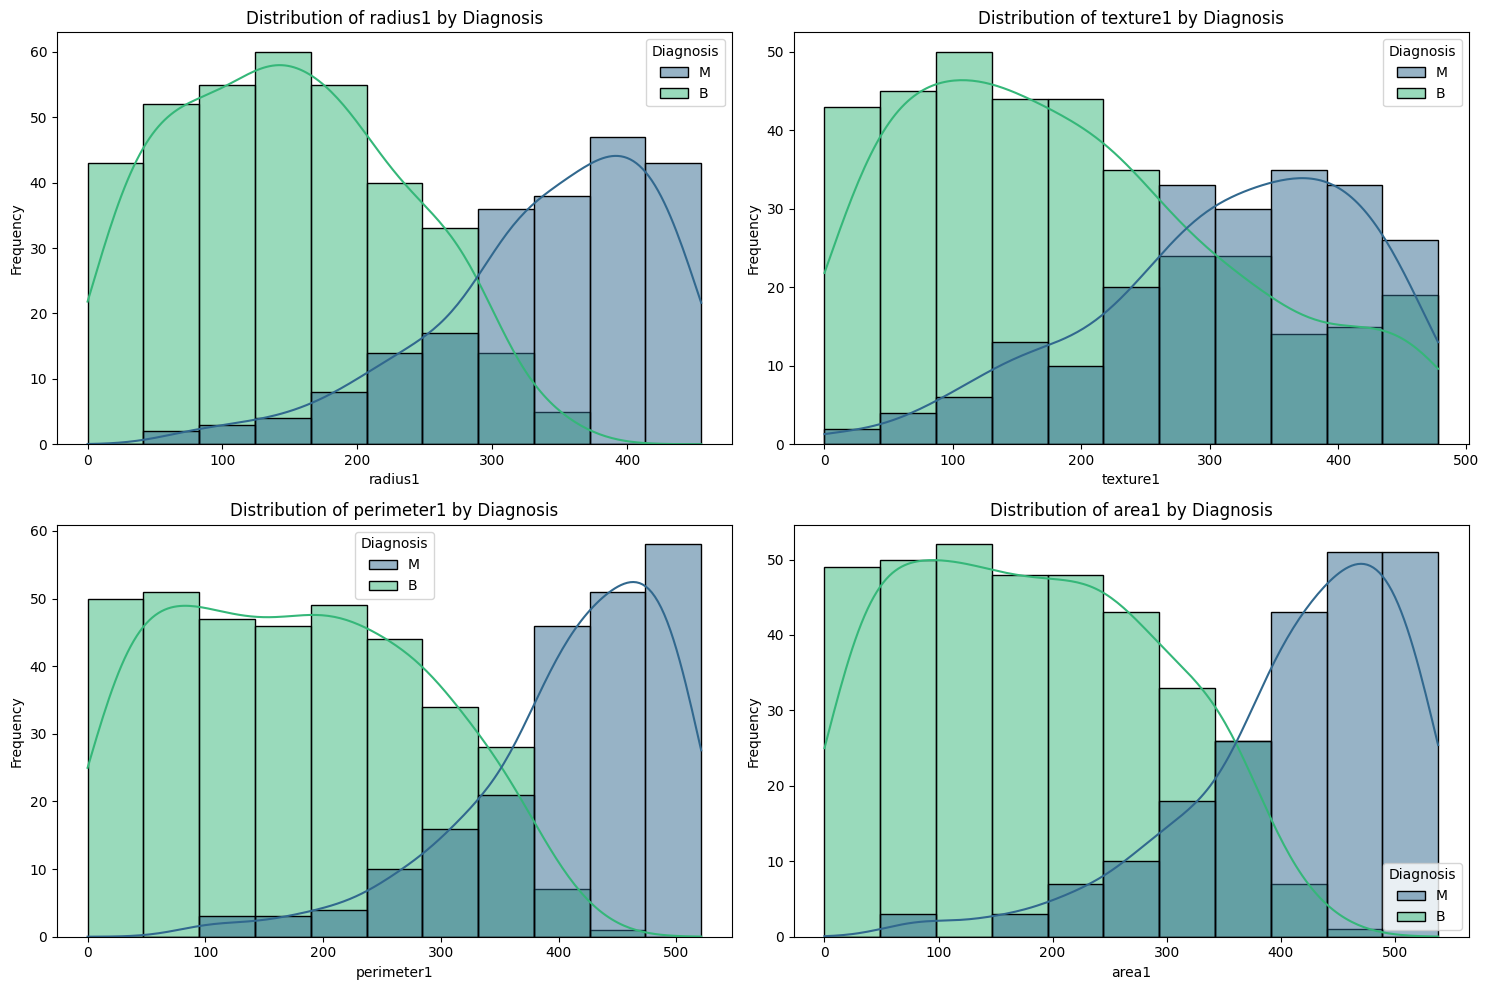

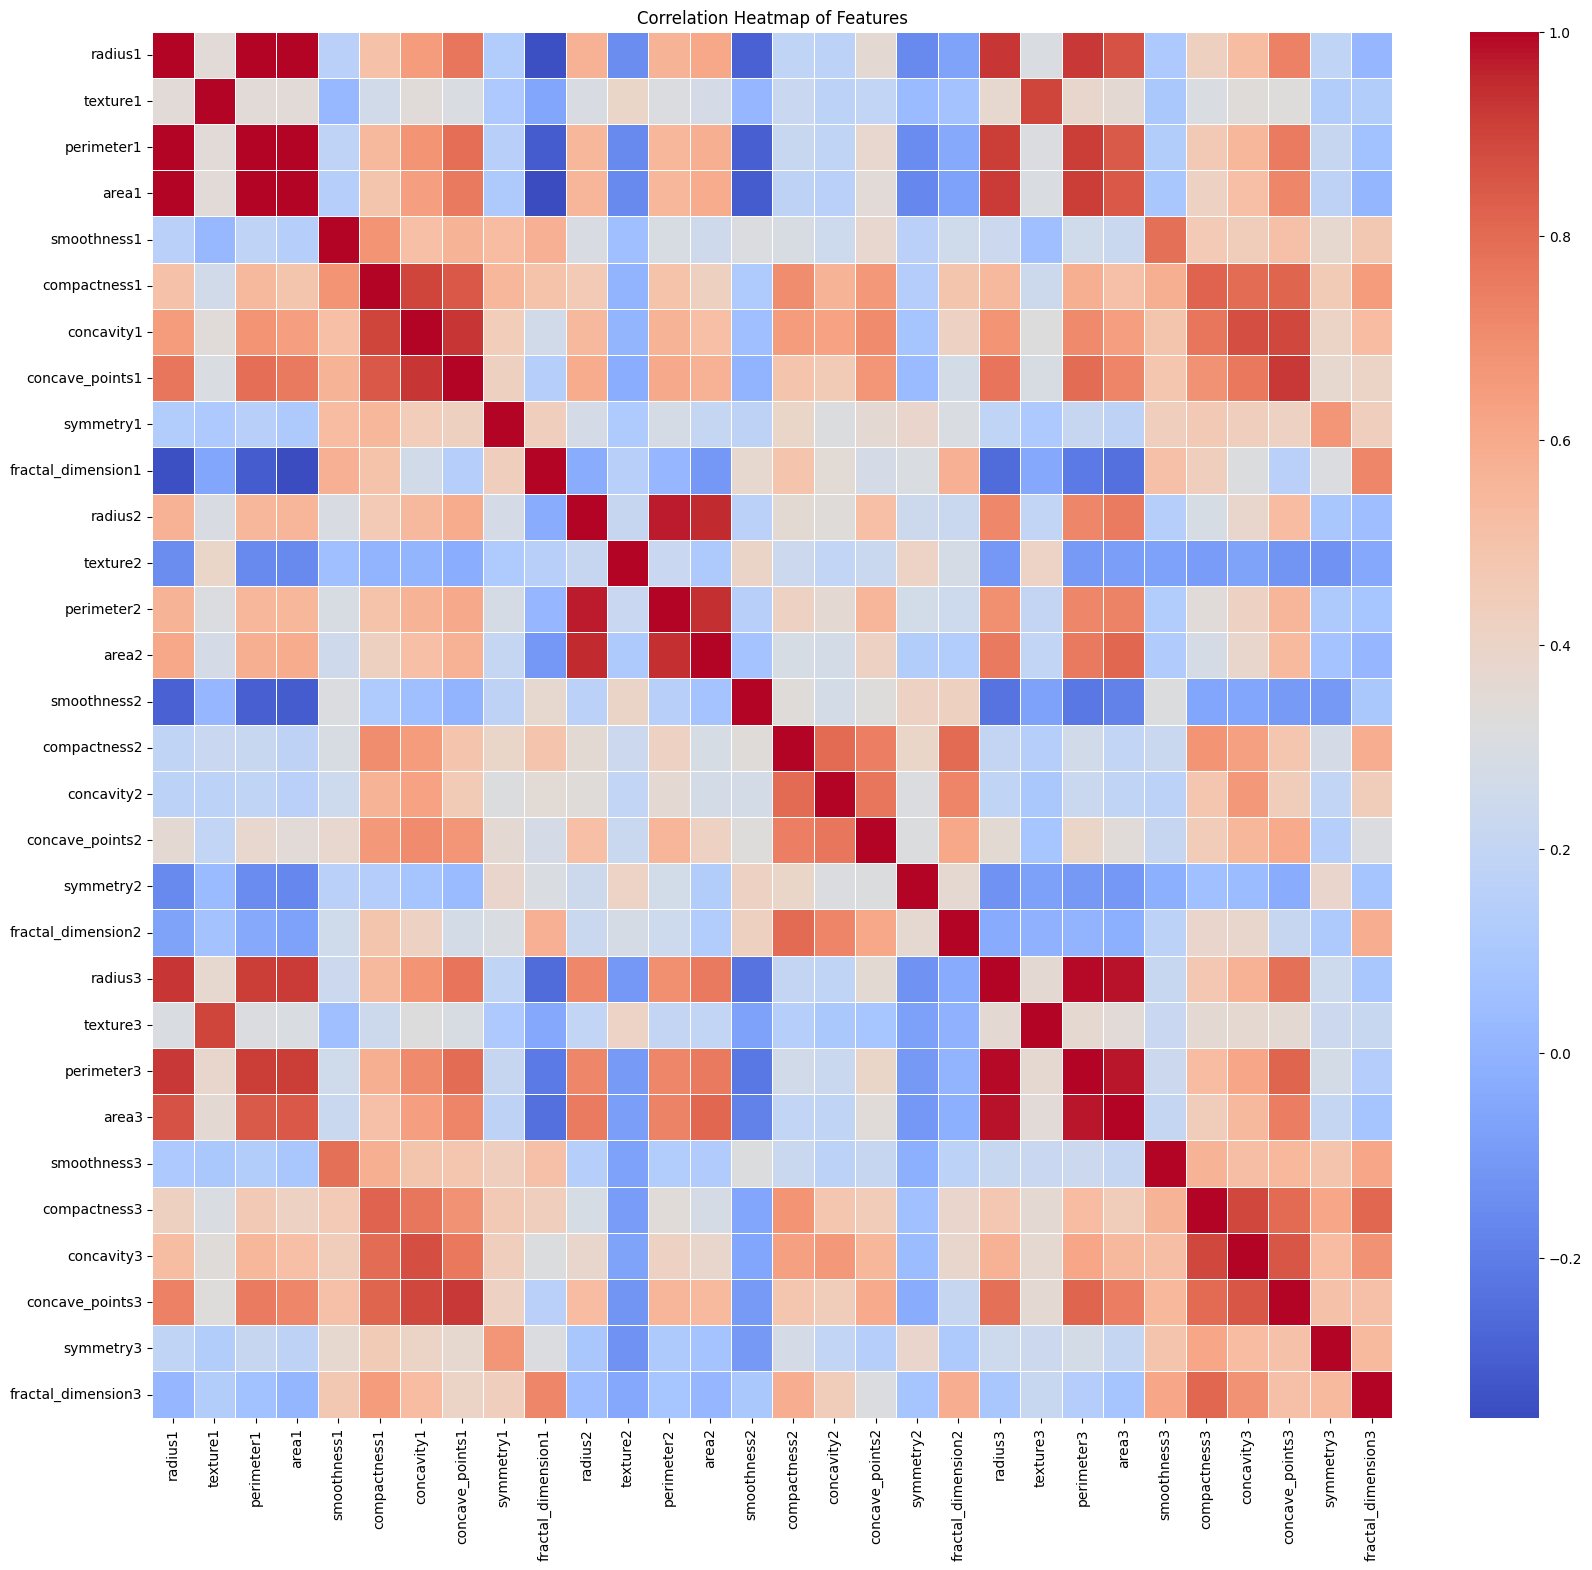

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the target variable (Diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Breast Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# 2. Histograms for a few key numerical features, separated by Diagnosis
# Let's pick 'radius1', 'texture1', 'perimeter1', 'area1' for visualization
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Diagnosis', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
# Exclude non-numeric 'Diagnosis' column for correlation calculation
df_numeric = df.drop(columns=['Diagnosis'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    int64  
 1   texture1            569 non-null    int64  
 2   perimeter1          569 non-null    int64  
 3   area1               569 non-null    int64  
 4   smoothness1         569 non-null    int64  
 5   compactness1        569 non-null    int64  
 6   concavity1          569 non-null    int64  
 7   concave_points1     569 non-null    int64  
 8   symmetry1           569 non-null    int64  
 9   fractal_dimension1  569 non-null    int64  
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
#Finding Correlation
cn=df_new.corr()
cn

In [ ]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

In [ ]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

In [ ]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

In [ ]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

In [ ]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

In [ ]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

In [ ]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

In [ ]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

In [ ]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

In [ ]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Importation des modèles nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Encode target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Instanciation de tous les modèles
lr_model = LogisticRegression(random_state=0, max_iter=1000) # Added max_iter for convergence
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()
mnb_model = MultinomialNB() # MultinomialNB can't handle negative input or non-integer input
svc_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added use_label_encoder and eval_metric for compatibility
mlp_model = MLPClassifier(random_state=42, max_iter=1000) # Added max_iter for convergence
gb_model = GradientBoostingClassifier(random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y_encoded, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y_encoded, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y_encoded, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y_encoded, cv=kf)

# Multinomial naive bayes model
# MultinomialNB requires non-negative feature values, which our data might not be after some transformations or for original float features.
# It's generally better suited for count data. We will skip it for now or ensure data is appropriate if needed.
# mnb_model_scores = cross_val_score(mnb_model,X, y_encoded, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y_encoded, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y_encoded, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y_encoded, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y_encoded, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y_encoded, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
# print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.943703007518797
Decision tree models' average accuracy: 0.9350250626566415
KNN models' average accuracy: 0.9366541353383457
Gaussian naive bayes models' average accuracy: 0.938408521303258
Support Vector Classifier models' average accuracy: 0.9173245614035087
Random forest models' average accuracy: 0.9630952380952381
XGBoost models' average accuracy: 0.9665413533834586
Multi-layer perceptron models' average accuracy: 0.9348997493734336
Gradient boost models' average accuracy: 0.9630012531328322


In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Encode target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

k = 10
kf = StratifiedKFold(n_splits=k)

# Instanciation de tous les modèles
lr_model = LogisticRegression(random_state=0, max_iter=1000) # Added max_iter for convergence
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()
mnb_model = MultinomialNB() # MultinomialNB can't handle negative input or non-integer input
svc_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added use_label_encoder and eval_metric for compatibility
mlp_model = MLPClassifier(random_state=42, max_iter=1000) # Added max_iter for convergence
gb_model = GradientBoostingClassifier(random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y_encoded, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y_encoded, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y_encoded, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y_encoded, cv=kf)

# Multinomial naive bayes model
# MultinomialNB requires non-negative feature values, which our data might not be after some transformations or for original float features.
# It's generally better suited for count data. We will skip it for now or ensure data is appropriate if needed.
# mnb_model_scores = cross_val_score(mnb_model,X, y_encoded, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y_encoded, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y_encoded, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y_encoded, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y_encoded, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y_encoded, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
# print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.9508145363408522
Decision tree models' average accuracy: 0.9280388471177945
KNN models' average accuracy: 0.9297619047619046
Gaussian naive bayes models' average accuracy: 0.9367794486215537
Support Vector Classifier models' average accuracy: 0.9138784461152882
Random forest models' average accuracy: 0.9631578947368421
XGBoost models' average accuracy: 0.9718984962406015
Multi-layer perceptron models' average accuracy: 0.9385651629072681
Gradient boost models' average accuracy: 0.9631578947368421


In [ ]:
df=pd.read_csv('/content/breast+cancer+wisconsin+diagnostic (2).zip')
df.head()

In [ ]:
import pandas as pd

# Download the dataset zip file
!wget -O /content/lung-cancer.zip "https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic"

# Unzip the file to extract 'survey lung cancer.csv' into /content/
!unzip -o /content/lung-cancer.zip -d /content/

# Load the CSV file into a pandas DataFrame
df=pd.read_csv('/content/breast+cancer+wisconsin+diagnostic (2).zip')
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # List of columns to encode
# columns_to_encode = [
#     'GENDER', 'LUNG_CANCER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
#     'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
#     'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
#     'SWALLOWING DIFFICULTY', 'CHEST PAIN'
# ]

# for col in columns_to_encode:
#     df[col] = le.fit_transform(df[col])

# df.head()

In [ ]:
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,370,1,455,452,444,531,521,526,416,483,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,426,186,486,513,120,215,321,396,219,91,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,406,324,478,487,403,459,478,516,348,184,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,98,297,164,95,471,533,507,493,426,498,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,418,60,493,506,332,414,480,492,216,147,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,438,370,503,522,410,364,509,522,173,74,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,413,463,483,499,295,312,415,483,187,54,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,340,458,410,421,115,308,329,335,94,82,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,429,467,500,501,442,530,530,531,413,424,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


from matplotlib import pyplot as plt
df['radius1'].plot(kind='hist', bins=20, title='radius1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['texture1'].plot(kind='hist', bins=20, title='texture1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['perimeter1'].plot(kind='hist', bins=20, title='perimeter1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['area1'].plot(kind='hist', bins=20, title='area1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='radius1', y='texture1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='texture1', y='perimeter1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='perimeter1', y='area1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area1', y='smoothness1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['radius1'].plot(kind='line', figsize=(8, 4), title='radius1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['texture1'].plot(kind='line', figsize=(8, 4), title='texture1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['perimeter1'].plot(kind='line', figsize=(8, 4), title='perimeter1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['area1'].plot(kind='line', figsize=(8, 4), title='area1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='radius1', y='Diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='texture1', y='Diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='perimeter1', y='Diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='area1', y='Diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)